In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
num_dots = 1000
num_clusters = 3
num_epochs = 100

In [4]:
dots = []
for i in range(num_dots):
    if np.random.random() >0.66:
        dots.append([np.random.normal(0.0, 1.0), np.random.normal(2.0,0.5)])
    elif np.random.random() >0.33:
        dots.append([np.random.normal(2.0, 1.3), np.random.normal(-1.0,0.6)])
    else:
        dots.append([np.random.normal(-1.0, 0.8), np.random.normal(-2.0,1.2)])

In [5]:
df = pd.DataFrame({"x":[v[0] for v in dots],"y": [v[1] for v in dots]})

In [6]:
df.head(10)

,x,y
0,-0.112397,2.332059
1,0.828814,-2.005731
2,0.679431,2.108050
3,-1.791874,2.869229
4,0.982990,2.667034
5,-1.867041,-1.713066
6,2.306062,-1.008292
7,1.768109,1.069149
8,2.205291,-2.226422
9,1.279608,-0.816439


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


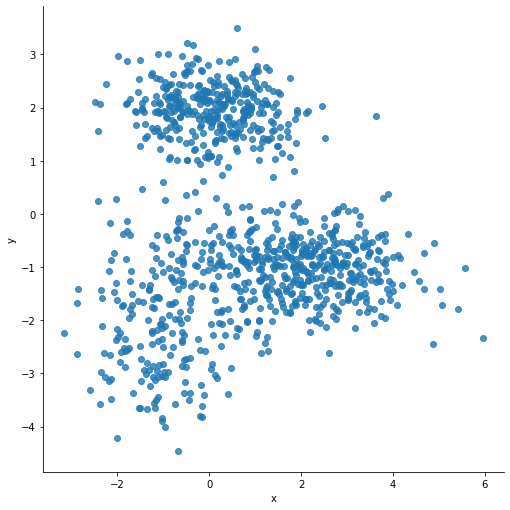

In [7]:
sns.lmplot("x","y", data=df, fit_reg= False, size=7)
plt.show()

In [12]:
vectors = tf.constant(dots)
vectors.get_shape()

TensorShape([Dimension(1000), Dimension(2)])

In [13]:
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[num_clusters,-1]))
centroids.get_shape()

TensorShape([Dimension(3), Dimension(2)])

In [14]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

print(expanded_vectors.shape)
print(expanded_centroids.shape)

(1, 1000, 2)
(3, 1, 2)


In [15]:
distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)),2)
assignments = tf.argmin(distances, 0)
assignments.get_shape()

TensorShape([Dimension(1000)])

In [18]:
means = tf.concat([tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)),[1,-1])),reduction_indices=[1]) for c in range(num_clusters)],0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
centroids_updated = tf.assign(centroids, means)

# 그래프 실행하기

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(num_epochs):
        _, centroids_values,assignment_values = sess.run([centroids_updated,centroids, assignments])
print("중심점")
print(centroids_values)

중심점
[[ 0.03805383  1.9227502 ]
 [-0.7788835  -1.8510889 ]
 [ 2.3637507  -1.0072191 ]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


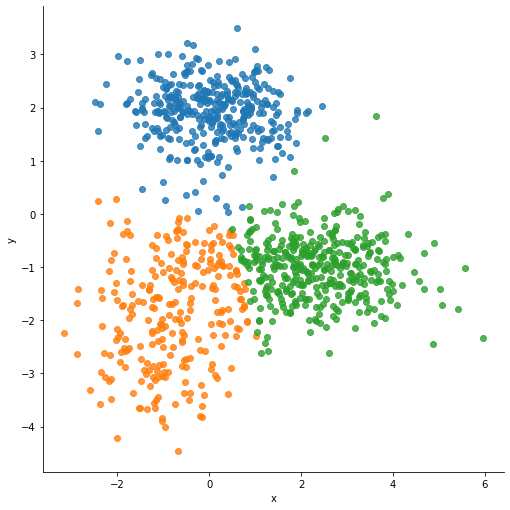

In [22]:
data = {"x":[],"y":[],"cluster":[]}
for i in range(len(assignment_values)):
    data["x"].append(dots[i][0])
    data["y"].append(dots[i][1])
    data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x","y", data=df, fit_reg= False, size=7,hue='cluster', legend=False)
plt.show()